# **质点在中心引力场中自由下落的一阶微扰近似**

### **问题背景**

在中心引力场中，从静止开始自由下落的质点满足微分方程
$$
F = \frac{GMm}{(h-q)^2} = m\ddot{q} \quad (*)
$$
其中 $q$ 为下落距离，$h$ 为 $t=0$ 时刻质点到引力场中心的距离。

微分方程 $(*)$ 难以求得解析解，但如果 $h\gg q$，则可近似认为引力场为匀强场，质点下落问题有解析解，即自由落体公式
$$
q = \frac{1}{2} \frac{GM}{h^2} t^2
$$

我将在 $h\gg q$ 的条件下，尝试利用Hamilton-Jacobi方程求得 $(*)$ 的一阶微扰近似解。

### **理论计算**

初值条件为 $q(0)=0,p(0)=m\dot{q}(0)=0$。

以距离引力场中心 $h$ 处为势能零点，记 $k\equiv \displaystyle\frac{GMm}{h^2}$，则在匀强场近似(以下称零阶微扰，并以上角标 $(0)$ 表示)下势能为
$$
V^{(0)} = -kq,\quad q=0 \Rightarrow V^{(0)}=0
$$
无近似时势能为
$$
V = -kh^2 \left(\frac{1}{h-q} - \frac{1}{h}\right),\quad q=0 \Rightarrow V=0
$$

零阶微扰Hamiltonian为 $H^{(0)} = \displaystyle\frac{p^2}{2m} + V^{(0)}$，Hamilton-Jacobi方程为
$$
\frac{\partial S^{(0)}}{\partial t} + \frac{1}{2m}\left(\frac{\partial S^{(0)}}{\partial q}\right)^2 - kq = 0
$$
用分离变量法，记 $S^{(0)}(q,t) \equiv S^{(0)}_t(t) + S^{(0)}_q(q)$，可得常微分方程
$$
\frac{d S^{(0)}_t}{d t} + P = 0 ,\quad
\frac{1}{2m} \left(\frac{d S^{(0)}_q}{d q}\right)^2 - kq = P
$$
其中 $P$ 为常数。可解得
$$
S^{(0)}_t = -Pt ,\quad
S^{(0)}_q = \int \sqrt{2m(P+kq)}dq = \frac{2\sqrt{2m}}{3k} (P+kq)^{3/2}
$$

以 $P$ 为新动量，记新坐标为 $Q$，Kamiltonian为 $K^{(0)}$，可得 $S^{(0)}(q,P,t)$ 诱导的正则变换
$$
K^{(0)} = \frac{\partial S^{(0)}}{\partial t} + H^{(0)} = 0 ,\quad
\left\{\begin{align*}
p &= \frac{\partial S^{(0)}}{\partial q} = \sqrt{2m(P+kq)} \\
Q &= \frac{\partial S^{(0)}}{\partial P} = -t + \frac{1}{k}\sqrt{2m(P+kq)}
\end{align*}\right.
$$
可解出旧坐标
$$
q(Q,P,t) = \frac{k(Q+t)^2}{2m} - \frac{P}{k}
$$

将初值条件代入正则变换，由 $K^{(0)}=0$，可解得
$$
\left\{\begin{align*}
P^{(0)}(t) = P(0) = 0 \\
Q^{(0)}(t) = Q(0) = 0
\end{align*}\right. ,\quad
q^{(0)} = \frac{kt^2}{2m} = \frac{1}{2} \frac{GM}{h^2} t^2
$$
此即自由落体公式。

下面计算一阶微扰近似(计算非常繁琐，将借助Wolfram Language进行)。
微扰Hamiltonian为
$$
\Delta H = V - V^{(0)} = \frac{kq^2}{q-h}
$$
一阶微扰Hamilton正则方程为
$$
\left\{\begin{align*}
\frac{d Q^{(1)}}{d t}(t) &=  \frac{\partial \Delta H}{\partial P} \left(Q^{(0)}(t),P^{(0)}(t),t\right)
,\quad &Q^{(1)}(0)=Q(0) \\
\frac{d P^{(1)}}{d t}(t) &= -\frac{\partial \Delta H}{\partial Q} \left(Q^{(0)}(t),P^{(0)}(t),t\right)
,\quad &P^{(1)}(0)=P(0)
\end{align*}\right.
$$
解此方程，可得

In [1]:
Clear["Global`*"];
$Assumptions = m>0 && h>0 && k>0;

q = k(Q+t)^2/(2m)-P/k;
ΔH = k*q^2/(q-h);

dQ1 =  D[ΔH, P] /. {Q->0,P->0};
dP1 = -D[ΔH, Q] /. {Q->0,P->0};

Q1 = Expand@FullSimplify[
    DSolve[{Qt'[t]==dQ1, Qt[0]==0}, Qt[t], t] [[1,1,2]]
];
P1 = Expand@FullSimplify[
    DSolve[{Pt'[t]==dP1, Pt[0]==0}, Pt[t], t] [[1,1,2]]
];

TeXForm[HoldForm[Q1[t]]==Q1]
TeXForm[HoldForm[P1[t]]==P1]

\text{Q1}(t)=\frac{h m t}{2 h m-k t^2}+\frac{\sqrt{\frac{h m}{k}} \tanh\
 
>   ^{-1}\left(\frac{k t}{\sqrt{2} \sqrt{h k m}}\right)}{\sqrt{2}}-t
\text{P1}(t)=\frac{k^3 t^4}{4 h m^2-2 k m t^2}

将 $Q^{(1)},P^{(1)}$ 代入正则变换，可得 $q$ 的一阶微扰近似解

In [11]:
q1 = q /. {Q->Q1,P->P1} //Expand;

TeXForm[HoldForm[q1[t]]==q1]

\text{q1}(t)=\frac{h^2 k m t^2}{2 \left(2 h m-k t^2\right)^2}-\frac{k^2 t^4}{4 h m^2-2 k\
 
>   m t^2}+\frac{h k t \sqrt{\frac{h m}{k}} \tanh ^{-1}\left(\frac{k t}{\sqrt{2} \sqrt{h\
 
>   k m}}\right)}{\sqrt{2} \left(2 h m-k t^2\right)}+\frac{1}{4} h \tanh\
 
>   ^{-1}\left(\frac{k t}{\sqrt{2} \sqrt{h k m}}\right)^2

### **应用实例**

下面分别使用匀强场近似、一阶微扰近似、数值模拟，计算 $t=0$ 时刻位于地球同步轨道(GEO)的质量为 $m=1\rm{kg}$ 的质点的自由下落。

各参数如下

In [13]:
G = 6.67259*10^(-11); (* N m^2 kg^-2 万有引力常数     *)
M = 5.965*10^24;      (* kg          地球质量        *)
m = 1;                (* kg          质点质量        *)
h = 42164000;         (* m           地球同步轨道半径 *)
R =  6371000;         (* m           地球半径        *)

k = G M m / h^2;
T = 60*60; (* s 下落时长 *)

计算匀强场近似及数值模拟，并画出各种计算方法算得的 $-q(t)$ 曲线。

In [20]:
q0 = k/(2m) t^2; (* 匀强场近似 *)
qN = NDSolve[    (* 数值模拟  *)
    {G*M/(h-qt[t])^2==qt''[t], qt[0]==0, qt'[0]==0},
    qt, {t,0,T}
] [[1,1,2]][t];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]], Directive[Opacity[1.], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[1.6]]}, 
 
>     {匀强场近似, 一阶微扰近似, 数值模拟}, LegendMarkers -> None, LabelStyle -> {}, 
 
>     LegendLayout -> Column], After, Identity]]
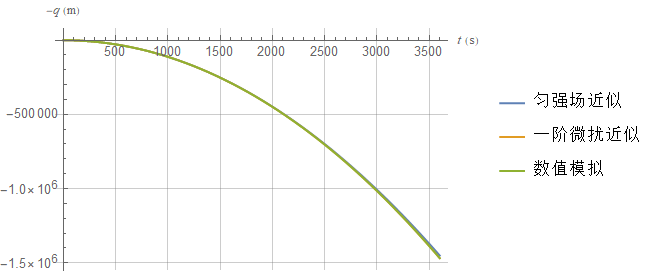

In [22]:
tLabel = Style[Row@{Style["t",Italic]," (s)"},FontFamily->"Times"];
qLabel = Style[Row@{Style["-q",Italic]," (m)"},FontFamily->"Times"];
Plot[{-q0, -q1, -qN}, {t,0,T},
    PlotLegends->{"匀强场近似","一阶微扰近似","数值模拟"},
    AxesLabel->{tLabel,qLabel}, GridLines->Automatic
]

可见三条曲线几乎完全重合，为看清三条曲线的差异，对图像 $t=3590 \sim 3600\mathrm{s}$ 的局部进行放大。

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]], Directive[Opacity[1.], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[1.6]]}, 
 
>     {匀强场近似, 一阶微扰近似, 数值模拟}, LegendMarkers -> None, LabelStyle -> {}, 
 
>     LegendLayout -> Column], After, Identity]]
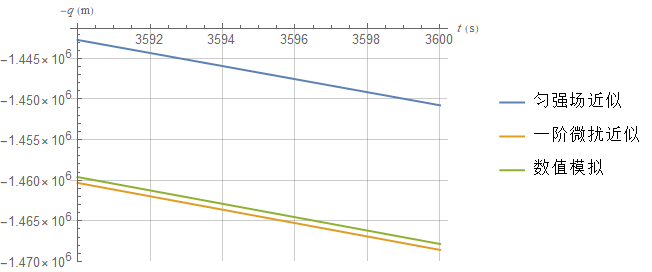

In [25]:
Plot[{-q0, -q1, -qN}, {t,3590,3600},
    PlotLegends->{"匀强场近似","一阶微扰近似","数值模拟"},
    AxesLabel->{tLabel,qLabel}, GridLines->Automatic
]

比较其它两种计算方法与数值模拟的差距。

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]]}, {匀强场近似, 一阶微扰近似}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
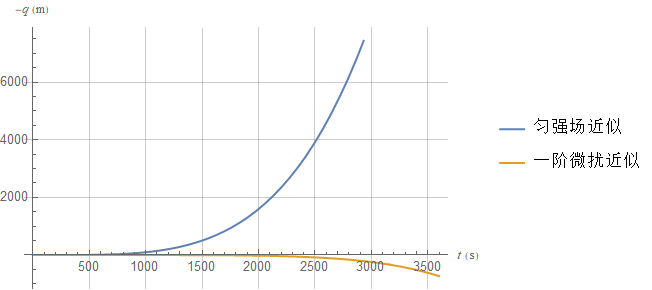

In [26]:
Plot[{-q0+qN, -q1+qN}, {t,0,T},
    PlotLegends->{"匀强场近似","一阶微扰近似"},
    AxesLabel->{tLabel,qLabel}, GridLines->Automatic
]

可见，若认为数值模拟最为精确，则一阶微扰近似显著优于匀强场近似。